In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing libraries, the data and shaping the latter as a dataframe
import pandas as pd
import numpy as np
import sys
import re
import seaborn as sns
import matplotlib as plt
attacks = pd.read_csv("ignoredstuff/attacks.csv",encoding = "ISO-8859-1")

In [3]:
#Seaborn config
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

# A. Initial exploration and general basic cleaning

In [4]:
#df's shape
attacks.shape

(25723, 24)

In [5]:
#df's columns
columns_attacks = attacks.columns
columns_attacks

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#a quick view...
attacks.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
17088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6147,1767.00.00,1767,1767.0,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,...,Description of shark does not ring true,NaN,1767.00.00-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1767.00.00,1767.00.00,156.0,NaN,NaN
22721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7391,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,1952.07.27.a,27-Jul-1952,1952.0,Sea Disaster,USA,California,"Off Santa Monica, Los Angeles County",Boat exploded,"Wes Wiggins and 7 others on the boat, Sparetime",M,...,NaN,R. Collier,1952.07.27.a-Sparetime.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.27.a,1952.07.27.a,1896.0,NaN,NaN


In [7]:
#elemental informatio
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
#looking for NaNs
attacks.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [9]:
#given the high number of NaNs it will be better to work with them before worrying about descriptive statistics...

In [10]:
#deleting all the rows exclusively composed by null values
attacks_1_1 = attacks.dropna(how="all")

In [11]:
#check again the number of NaNs
attacks_1_1.isna().sum()
#17020 rows contained only null values and were thus deleted


Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [12]:
#checking the shape of our new "cleaner" df
attacks_1_1.shape

(8703, 24)

In [13]:
#comparing the info provided by .shape and the sum of null given by .isna().sum()
#the columns "Unnamed: 22" & "Unnamed: 23" will be deleted as the contain basically null values
#which are useless and create a gap of such a mgnitude that is simply unfeasible to fill 

attacks_1_2 = attacks_1_1.drop(["Unnamed: 22" , "Unnamed: 23"], axis=1)


In [14]:
#our new df's columns
columns_attacks_1_2 = attacks_1_2.columns
columns_attacks_1_2

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [15]:
#taking a look at a sample
attacks_1_2.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
4269,1956.00.00.d,1956,1956.0,Unprovoked,USA,Virginia,"Virginia Beach, Princess Anne County",Swimming,girl,F,...,UNKNOWN,NaN,NaN,"A. MacCormick, p.11, citing the New Orleans Ti...",1956.00.00.d-girl-VirginiaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.00.00.d,1956.00.00.d,2034.0
4487,1950.00.00.k,1950,1950.0,Unprovoked,SRI LANKA,Southern Province,Dodnduwa,Spearfishing,Langston Pereira,M,...,N,NaN,Whtietip reef shark,"R.I. DeSilva, GSAF",1950.00.00.k-Pereira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.00.00.k,1950.00.00.k,1816.0
8205,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6464,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3026,1981.05.24,24-May-1981,1981.0,Unprovoked,USA,Hawaii,"Ha'ena Beach Park, Kaua'i","Scuba diving, reportedly also spearfishing",Roger B. Garletts,M,...,Y,NaN,NaN,"J. Borg, p.87; L. Taylor (1993), pp.104-105",1981.05.24-Garletts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1981.05.24,1981.05.24,3277.0
6405,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7166,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,2012.09.24,24-Sep-2012,2012.0,Unprovoked,USA,Florida,"Spanish House Beach, Brevard County",Surfing,Brandon Murray,M,...,N,Afternoon,4' shark,"TC Palm, 9/26/2012",2012.09.24-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.24,2012.09.24,5566.0
3951,1960.11.00.c,Nov-1960,1960.0,Provoked,NEW GUINEA,Western District,Toro Passage,NaN,Fisheries trainee,M,...,N,NaN,"1.4 m [4'6""] blacktip shark","A.M. Rapson, p.147",1960.11.00.c-ToroPassage.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.11.00.c,1960.11.00.c,2352.0
3430,1969.06.12,12-Jun-1969,1969.0,Unprovoked,JAMAICA,Clarendon,Off Rocky Point,Diving,Dennis Washington,M,...,N,Morning,NaN,"The Gleaner, 6/20/1969",1969.06.12-Washington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.06.12,1969.06.12,2873.0


# B. The Hypotheses to test

It has been decided that the hypotheses to test are the following:

- Hypothesis 1: Shark attacks' fatality rate has fallen over time
- Hypothesis 2: Shark attacks' fatality rate is negatively correlated with the level of development of the place where the attack takes place

# C. Reshaping and cleaning the dataset according to hypotheses to test

The formulated hypotheses imply that fatality will be our main variable of interest. Besides that, included variable which are to be inspected are those related to time and location. These are respectively "Date", "Year" "Time" plus those related to Case Number on the one hand, and "Area" "Location" and "Country" on the other.

In [16]:
#first of all, all the variable which are not of interest will be discarded
columns_to_discard = ['Type', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Time','Species ', 'Investigator or Source', 
                      'pdf', 'href formula', 'href','original order']

attacks_1_3= attacks_1_2.drop(columns_to_discard, axis=1)


In [17]:
#taking a look at this new refined df
print(attacks_1_3.shape)
attacks_1_3.sample(10)

(8703, 9)


,Case Number,Date,Year,Country,Area,Location,Fatal (Y/N),Case Number.1,Case Number.2
3592,1966.01.11,11-Jan-1966,1966.0,SOUTH AFRICA,Eastern Cape Province,Riet River,N,1966.01.11,1966.01.11
7088,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,2014.10.03.a,03-Oct-2014,2014.0,USA,California,Santa Barbara County,N,2014.10.03.a,2014.10.03.a
3151,1977.03.17,17-Mar-1977,1977.0,SOUTH AFRICA,Western Cape Province,"Lappiesbaai Beach, Stilbaai",N,1977.03.17,1977.03.17
8117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5234,1922.01.13,13-Jan-1922,1922.0,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",N,1922.01.13,1922.01.13
2390,1995.04.16,16-Apr-1995,1995.0,USA,Florida,"New Smyrna Beach, Volusia County",NaN,1995.04.16,1995.04.16
6493,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,2006.08.27,27-Aug-2006,2006.0,REUNION,Saint-Gilles-les-Bains,"Les Aigrettes, near Boucan-Canot",N,2006.08.27,2006.08.27
4696,1942.11.13.b,13-Nov-1942,1942.0,SOLOMON ISLANDS / VANUATU,NaN,"North of Guadalcanal, Solomon Islands while en...",Y,1942.11.13.b,1942.11.13.b


In [18]:
#resetting the df's index
attacks_1_3_1 = attacks_1_3.reset_index()
display(attacks_1_3_1) 

,index,Case Number,Date,Year,Country,Area,Location,Fatal (Y/N),Case Number.1,Case Number.2
0,0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",N,2018.06.25,2018.06.25
1,1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",N,2018.06.18,2018.06.18
2,2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",N,2018.06.09,2018.06.09
3,3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,N,2018.06.08,2018.06.08
4,4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,N,2018.06.04,2018.06.04
...,...,...,...,...,...,...,...,...,...,...
8698,8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#now lets delete all rows where the variable "Fatal (Y/N)" takes a null value, for that a specific function has been defined
# .isna().sum() is employed to check if rows including null values for the specified column have been indeed removed.
from src import row_nan_out

attacks_1_3_2 = row_nan_out(attacks_1_3_1,"Fatal (Y/N)")
print(attacks_1_3_2.isna().sum())


Se encontaron valores nulos a eliminar en los datos.
index              0
Case Number        1
Date               0
Year               1
Country           45
Area             404
Location         483
Fatal (Y/N)        0
Case Number.1      0
Case Number.2      0
dtype: int64


In [20]:
#resetting the index and removing redundant past indices
attacks_1_3_3 = attacks_1_3_2.reset_index()
attacks_1_3_4 = attacks_1_3_3.drop(["index", "level_0"], axis=1)

### C.1 Fatality rate across time

In [21]:
#the space in the column name "Case Number" is removed here asit caused problem further down the code
attacks_1_3_4 = attacks_1_3_4.rename(columns={"Case Number" : "CaseNumber"})

In [22]:
attacks_1_3_5 = attacks_1_3_4.copy()

#Comparing Case Number.1 and Case Number.2 as they seem to be largely the same...
#The rate of disagreement between the two is 0,29%, case number.2 is dropped as a consequence
#the column created for the comparisson is also deleted

attacks_1_3_5['Cases_Check'] = np.where((attacks_1_3_5["Case Number.1"] == attacks_1_3_5["Case Number.2"]), True , False)
print(attacks_1_3_5['Cases_Check'].value_counts())
attacks_1_3_5 = attacks_1_3_5.drop(["Case Number.2", "Cases_Check"], axis=1)

#the same comparisson is performed for Case Number.1 and Case Number
#with a rate of disagreement of 0,36% Case Number.1 is dropped from the dataframe too
#the column created for the comparisson is also deleted again

attacks_1_3_5['Cases_Check'] = np.where((attacks_1_3_5["Case Number.1"] == attacks_1_3_5["CaseNumber"]), True , False)
print(attacks_1_3_5['Cases_Check'].value_counts())
attacks_1_3_6 = attacks_1_3_5.drop(["Case Number.1", "Cases_Check"], axis=1)

display(attacks_1_3_6)

True     5746
False      17
Name: Cases_Check, dtype: int64
True     5742
False      21
Name: Cases_Check, dtype: int64


,CaseNumber,Date,Year,Country,Area,Location,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",N
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",N
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",N
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,N
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,N
...,...,...,...,...,...,...,...
5758,ND.0005,Before 1903,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Y
5759,ND.0004,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Y
5760,ND.0003,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Y
5761,ND.0002,1883-1889,0.0,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


In [23]:
#The function first_year is applied to extract the substring containing year information 
#for values in columns Date & CaseNumber

from src import first_year
attacks_1_3_6["Case_Year"] = attacks_1_3_6.CaseNumber.apply(first_year)
attacks_1_3_6["Date_Year"] = attacks_1_3_6.Date.apply(first_year)
display(attacks_1_3_6)


,CaseNumber,Date,Year,Country,Area,Location,Fatal (Y/N),Case_Year,Date_Year
0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",N,2018,2018
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",N,2018,2018
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",N,2018,2018
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,N,2018,2018
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,N,2018,2018
...,...,...,...,...,...,...,...,...,...
5758,ND.0005,Before 1903,0.0,AUSTRALIA,Western Australia,Roebuck Bay,Y,0005,1903
5759,ND.0004,Before 1903,0.0,AUSTRALIA,Western Australia,NaN,Y,0004,1903
5760,ND.0003,1900-1905,0.0,USA,North Carolina,Ocracoke Inlet,Y,0003,1900
5761,ND.0002,1883-1889,0.0,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y,0002,1883


In [24]:
#analyzing descriptive statistics for Year Variables in order to decide which range of years to focus on
#with at least 75% of all year observations in the sample for the three variables which inform about years taking place
#after 1945, this will be selected as starting point for the sample. Besides this, 1945 is also an interesting point 
#for historical and economic reasons.
#1465 observations have been consequently discarded


attacks_1_3_6 = attacks_1_3_6.astype({"Case_Year": float})
attacks_1_3_6 = attacks_1_3_6.astype({"Date_Year": float})
print(attacks_1_3_6["Date_Year"].describe())
print(attacks_1_3_6["Case_Year"].describe())
print(attacks_1_3_6["Year"].describe())

attacks_1_3_7 = attacks_1_3_6[attacks_1_3_6.Date_Year > 1945]
attacks_1_3_7 = attacks_1_3_7[attacks_1_3_7.Case_Year > 1945]
attacks_1_3_7 = attacks_1_3_7[attacks_1_3_7.Year > 1945]
attacks_1_3_7.shape


count    5744.000000
mean     1967.455084
std        48.007509
min      1543.000000
25%      1945.000000
50%      1979.000000
75%      2005.000000
max      2018.000000
Name: Date_Year, dtype: float64
count    5762.000000
mean     1926.352135
std       281.706297
min         0.000000
25%      1942.000000
50%      1978.000000
75%      2005.000000
max      2018.000000
Name: Case_Year, dtype: float64
count    5762.000000
mean     1924.575842
std       292.236459
min         0.000000
25%      1942.000000
50%      1978.000000
75%      2005.000000
max      2018.000000
Name: Year, dtype: float64


(4240, 9)

In [25]:
#CHECKING:
#Number of nans in df: none of them is in th year related variables so the present nans are not a cause of concern for now
#Number of discrepancies between Year related columns (max discrepancy rate = 0,23%)
#Lastly the unique values of year related columns are printed for a visual inspection 

print(attacks_1_3_7.isna().sum())

attacks_1_3_7['Cases_Check_1'] = np.where((attacks_1_3_7["Case_Year"] == attacks_1_3_7["Date_Year"]), True , False)
print(attacks_1_3_7['Cases_Check_1'].value_counts())
attacks_1_3_7['Cases_Check_2'] = np.where((attacks_1_3_7["Case_Year"] == attacks_1_3_7["Year"]), True , False)
print(attacks_1_3_7['Cases_Check_2'].value_counts())
attacks_1_3_7['Cases_Check_3'] = np.where((attacks_1_3_7["Date_Year"] == attacks_1_3_7["Year"]), True , False)
print(attacks_1_3_7['Cases_Check_3'].value_counts())

print(attacks_1_3_7.Case_Year.unique())
print(attacks_1_3_7.Date_Year.unique())
print(attacks_1_3_7.Year.unique())

CaseNumber       0
Date             0
Year             0
Country         12
Area           199
Location       247
Fatal (Y/N)      0
Case_Year        0
Date_Year        0
dtype: int64
True     4231
False       9
Name: Cases_Check_1, dtype: int64
True     4239
False       1
Name: Cases_Check_2, dtype: int64
True     4230
False      10
Name: Cases_Check_3, dtype: int64
[2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007.
 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995.
 1984. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1983.
 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971.
 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959.
 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1947.
 1946.]
[2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2008. 2010. 2009. 2006.
 2007. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995.
 1984. 1994. 1993. 1992. 1991. 1990. 1

In [26]:
#row where year related values do not coincide are dropped aiming at 0% discrpenacy ratio and thus maximum accuracy in
#year measurement

attacks_1_3_8 = attacks_1_3_7[attacks_1_3_7["Date_Year"] == attacks_1_3_7["Year"]]

attacks_1_3_8['Cases_Check_1'] = np.where((attacks_1_3_8["Case_Year"] == attacks_1_3_8["Date_Year"]), True , False)
print(attacks_1_3_8['Cases_Check_1'].value_counts())
attacks_1_3_8['Cases_Check_2'] = np.where((attacks_1_3_8["Case_Year"] == attacks_1_3_8["Year"]), True , False)
print(attacks_1_3_8['Cases_Check_2'].value_counts())
attacks_1_3_8['Cases_Check_3'] = np.where((attacks_1_3_8["Date_Year"] == attacks_1_3_8["Year"]), True , False)
print(attacks_1_3_8['Cases_Check_3'].value_counts())

#after checking that the discrepancy rate is effectively down to 0% all redundant ando/or innecesary columns are dropped

display(attacks_1_3_8)
attacks_1_3_9 = attacks_1_3_8.drop(["CaseNumber", "Date", "Case_Year", "Date_Year", 
                                    "Cases_Check_1", "Cases_Check_3", "Cases_Check_2"], axis=1)

True    4230
Name: Cases_Check_1, dtype: int64
True    4230
Name: Cases_Check_2, dtype: int64
True    4230
Name: Cases_Check_3, dtype: int64


<ipython-input-26-c518159c7c29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks_1_3_8['Cases_Check_1'] = np.where((attacks_1_3_8["Case_Year"] == attacks_1_3_8["Date_Year"]), True , False)
<ipython-input-26-c518159c7c29>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks_1_3_8['Cases_Check_2'] = np.where((attacks_1_3_8["Case_Year"] == attacks_1_3_8["Year"]), True , False)
<ipython-input-26-c518159c7c29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,CaseNumber,Date,Year,Country,Area,Location,Fatal (Y/N),Case_Year,Date_Year,Cases_Check_1,Cases_Check_2,Cases_Check_3
0,2018.06.25,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",N,2018.0,2018.0,True,True,True
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",N,2018.0,2018.0,True,True,True
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",N,2018.0,2018.0,True,True,True
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,N,2018.0,2018.0,True,True,True
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,N,2018.0,2018.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4236,1946.01.05,05-Jan-1946,1946.0,AUSTRALIA,New South Wales,"Oatley Bay near Como, Georges River",Y,1946.0,1946.0,True,True,True
4237,1946.01.01,01-Jan-1946,1946.0,SOUTH AFRICA,Eastern Cape Province,"Pollock Beach, Port Elizabeth",N,1946.0,1946.0,True,True,True
4238,1946.00.00.c,1946,1946.0,SOUTH AFRICA,Western Cape Province,Plettenberg Bay,N,1946.0,1946.0,True,True,True
4239,1946.00.00.b,1946,1946.0,SOUTH AFRICA,Western Cape Province,Table Bay,N,1946.0,1946.0,True,True,True


In [27]:
#changing "Year" (Now our main variable for measuring time) to integer to better suit the nature of the variable
#and then displaying verison 1_4 of the data frame for visual inspection.
attacks_1_4 = attacks_1_3_9.astype({"Year": int})
attacks_1_4 = attacks_1_4.reset_index()
attacks_1_4 = attacks_1_4.drop(["index"], axis=1)
display(attacks_1_4)
attacks_1_4.shape

,Year,Country,Area,Location,Fatal (Y/N)
0,2018,USA,California,"Oceanside, San Diego County",N
1,2018,USA,Georgia,"St. Simon Island, Glynn County",N
2,2018,USA,Hawaii,"Habush, Oahu",N
3,2018,AUSTRALIA,New South Wales,Arrawarra Headland,N
4,2018,MEXICO,Colima,La Ticla,N
...,...,...,...,...,...
4225,1946,AUSTRALIA,New South Wales,"Oatley Bay near Como, Georges River",Y
4226,1946,SOUTH AFRICA,Eastern Cape Province,"Pollock Beach, Port Elizabeth",N
4227,1946,SOUTH AFRICA,Western Cape Province,Plettenberg Bay,N
4228,1946,SOUTH AFRICA,Western Cape Province,Table Bay,N


(4230, 5)

In [28]:
#preparing to clean "Fatal (Y/N)" column
print(attacks_1_4["Fatal (Y/N)"].unique())
print(attacks_1_4["Fatal (Y/N)"].value_counts())

#attacks_1_4 = attacks_1_4.drop(["index"], axis=1)


['N' 'Y' 'M' 'UNKNOWN' '2017' ' N']
N          3515
Y           662
UNKNOWN      44
 N            7
M             1
2017          1
Name: Fatal (Y/N), dtype: int64


In [29]:
#Values like for "Fatal (Y/N)" which offer no clue of what could be their true value between Y/N are discarded 
#(i.e. "Unknown" & "2017"). Then Values whose input is not "N" or "Y" but who arguably could be related to one of those
#are substituted (i.e. ' N' & 'M'). Note: 'M' is located right next to 'N' in the qwerty keyboard which makes pretty
#likely that its true intended value is 'N' but this eas not the case due to a typo at the time of inputting the data.

attacks_1_4_1 = attacks_1_4[attacks_1_4["Fatal (Y/N)"] != "UNKNOWN"]
attacks_1_4_1 = attacks_1_4_1[attacks_1_4_1["Fatal (Y/N)"] != "2017"]
attacks_1_4_1['Fatal (Y/N)'] = attacks_1_4_1['Fatal (Y/N)'].replace([' N', 'M'],'N')
print(attacks_1_4_1["Fatal (Y/N)"].unique())
print(attacks_1_4_1["Fatal (Y/N)"].value_counts())

['N' 'Y']
N    3523
Y     662
Name: Fatal (Y/N), dtype: int64


In [30]:
#now index_b_count function will be applied to compute mortality ratio by year. For more information on this function and
# its operative visit the associated file (src.py) in the repository
#Te function will return a dictionary with mortality rates by year
from src import index_b_count

a_list = (list(attacks_1_4_1["Year"].unique()))
MR_dict = index_b_count(attacks_1_4_1, a_list, "Fatal (Y/N)", "Year" )



In [31]:
#The obtained dictionary called MR_dict will be converted to a dataframe and then employed to test 
#our first hypothesis on changing (falling) mortality rates over time

MR_df_1 = pd.DataFrame.from_dict(MR_dict, orient="index")
MR_df_1.reset_index(level=0, inplace=True)
MR_df_1 = MR_df_1.rename(columns={'index': 'Year', 0: 'Ratio'} )
MR_df_1

,Year,Ratio
0,2018,0.019608
1,2017,0.069565
2,2016,0.043860
3,2015,0.074380
4,2014,0.063063
...,...,...
68,1950,0.344828
69,1949,0.529412
70,1948,0.647059
71,1947,0.272727


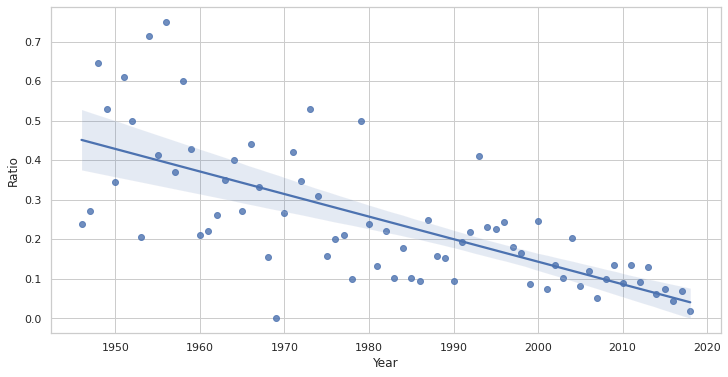

In [32]:
#an histogram will help us visualy analyze the data, moreover a trend line has been fitted

sns.regplot(x= "Year", y="Ratio" , data=MR_df_1);

In [33]:
#PUEDE CONTINUAR... agrupar por décadas, buscar visualizaciones complementarias...
#añadir estadisticos descriptivos de moratlidad por años
# + Añadir conclusiones 
# grafico de barras para la agregación (Sea por decadas, lustros o menos)
#plotly histogram: Muy pro

### C.2 Fatality and development

In [34]:
#first of all lets check again the status of geographic based columns in order to clean them and prepare them to 
#be matched with HDI data

print(attacks_1_4_1.isna().sum())
attacks_1_4_1_d = attacks_1_4_1[attacks_1_4_1['Country'].isnull()]
attacks_1_4_1_d.head(12)


#with just 12 nan in Country (being it the most complete of all three available geographic variables), a visual inspection
#is carried on to determine if some of those 12 missing values can be filled with information from the other two variables
#(area and location). This is indeed the case for 6 out of these 12 null values, the other six will have to be discarded.
#For more detail see APENDIX A.

Year             0
Country         12
Area           196
Location       242
Fatal (Y/N)      0
dtype: int64


,Year,Country,Area,Location,Fatal (Y/N)
61,2017,NaN,NaN,NaN,N
2725,1983,NaN,English Channel,NaN,N
3116,1970,NaN,NaN,NaN,N
3125,1970,NaN,NaN,NaN,N
3132,1970,NaN,NaN,NaN,N
3135,1970,NaN,NaN,NaN,N
3161,1969,NaN,NaN,NaN,N
3314,1965,NaN,NaN,Florida Strait,N
3679,1960,NaN,"Between Timor & Darwin, Australia",NaN,N
3870,1956,NaN,Near the Andaman & Nicobar Islands,NaN,Y


In [35]:
#Nans that can be filled are filled, and those that cannot be filled are deleted, after checking that there are no nulls
#in "Country" to be potentially filled with information from "Area" and/or "Location", these columns are discarded too
type(attacks_1_4_1)
attacks_1_4_1.at[2725, 'Country'] = "UNITED KINGDOM"
attacks_1_4_1.at[3314, 'Country'] = "USA"
attacks_1_4_1.at[3679, 'Country'] = "AUSTRALIA"
attacks_1_4_1.at[3870, 'Country'] = "MYANMAR"
attacks_1_4_1.at[3905, 'Country'] = "MADAGASCAR"
attacks_1_4_1.at[4121, 'Country'] = "CUBA"
attacks_1_4_2 = attacks_1_4_1[attacks_1_4_1['Country'].notna()]
print(attacks_1_4_2.isna().sum())
attacks_1_4_2.reset_index(inplace=True)
attacks_1_4_2 = attacks_1_4_2.drop(["Area", "Location", "index"], axis=1)

display(attacks_1_4_2)

Year             0
Country          0
Area           190
Location       236
Fatal (Y/N)      0
dtype: int64


,Year,Country,Fatal (Y/N)
0,2018,USA,N
1,2018,USA,N
2,2018,USA,N
3,2018,AUSTRALIA,N
4,2018,MEXICO,N
...,...,...,...
4174,1946,AUSTRALIA,Y
4175,1946,SOUTH AFRICA,N
4176,1946,SOUTH AFRICA,N
4177,1946,SOUTH AFRICA,N


In [36]:
#Now is time to tackle de issue of imprecise or incorrect values for "Country", a list with each unique value has been
#created and the sorted to allow an easier examination and detection of typos, duplicates etc.
#though tedious the only way to proceed on this step is to tacke it by hand...

list_b = list(attacks_1_4_2["Country"].unique())
sorted_list = sorted(list_b)
for i in sorted_list:
    print(i)

 TONGA
ADMIRALTY ISLANDS
AMERICAN SAMOA
ANDAMAN / NICOBAR ISLANDAS
ANGOLA
ARGENTINA
ARUBA
ATLANTIC OCEAN
AUSTRALIA
AZORES
BAHAMAS
BANGLADESH
BELIZE
BERMUDA
BRAZIL
BRITISH ISLES
BRITISH WEST INDIES
CANADA
CARIBBEAN SEA
CHILE
CHINA
COLUMBIA
COSTA RICA
CROATIA
CUBA
DIEGO GARCIA
DOMINICAN REPUBLIC
ECUADOR
EGYPT
EGYPT / ISRAEL
EL SALVADOR
ENGLAND
FEDERATED STATES OF MICRONESIA
FIJI
FRANCE
FRENCH POLYNESIA
Fiji
GABON
GRAND CAYMAN
GREECE
GRENADA
GUAM
GULF OF ADEN
HONG KONG
INDIA
INDIAN OCEAN
INDONESIA
IRAN
IRAQ
ISRAEL
ITALY
JAMAICA
JAPAN
JOHNSTON ISLAND
KENYA
KIRIBATI
LIBERIA
LIBYA
MADAGASCAR
MALAYSIA
MALDIVE ISLANDS
MALDIVES
MALTA
MARSHALL ISLANDS
MARTINIQUE
MAURITIUS
MAYOTTE
MEXICO
MEXICO 
MICRONESIA
MID ATLANTIC OCEAN
MONTENEGRO
MOZAMBIQUE
MYANMAR
NAMIBIA
NETHERLANDS ANTILLES
NEW BRITAIN
NEW CALEDONIA
NEW GUINEA
NEW ZEALAND
NICARAGUA 
NIGERIA
NORTH ATLANTIC OCEAN
NORTH ATLANTIC OCEAN 
NORTH PACIFIC OCEAN
NORTH SEA
NORTHERN ARABIAN SEA
NORTHERN MARIANA ISLANDS
NORWAY
OKINAWA
PACIFIC OCEAN
P

In [37]:
#After Localazing all the errors to be fixed, they are tackled in this cell, replacing wrong/inprecise names for their
#corrected version, and dropping all those which are too imprecise.

attacks_1_4_2.Country = attacks_1_4_2.Country.replace({' TONGA': 'TONGA',
                                                       'ANDAMAN / NICOBAR ISLANDAS': 'MYANMAR',
                                                       'AZORES' : 'PORTUGAL',
                                                       'BERMUDA':'UNITED KINGDOM',
                                                       'BRITISH ISLES':'UNITED KINGDOM',
                                                       'BRITISH WEST INDIES':'JAMAICA',
                                                       'COLUMBIA':'COLOMBIA',
                                                       'DIEGO GARCIA':'UNITED KINGDOM',
                                                       'EGYPT / ISRAEL':'ISRAEL',
                                                       'ENGLAND':'UNITED KINGDOM',
                                                       'FRENCH POLYNESIA':'MICRONESIA',
                                                       'Fiji':'FIJI',
                                                       'GRAND CAYMAN':'UNITED KINGDOM',
                                                       'GULF OF ADEN':'YEMEN',
                                                       'JOSHTON ISLAND':'USA',
                                                       'MALDIVE ISLANDS':'MALDIVES',
                                                       'MARSHALL ISLANDS':'USA',
                                                       'MARTINIQUE':'FRANCE',
                                                       'MAYOTTE':'FRANCE',
                                                       'MEXICO ':'MEXICO',
                                                       'FEDERATED STATES OF MICRONESIA':'MICRONESIA',
                                                       'NETHERLANDS ANTILLES':'JAMAICA',
                                                       'NEW BRITAIN':'PAPUA NEW GUINEA',
                                                       'NEW CALEDONIA':'FRANCE',
                                                       'NEW GUINEA':'PAPUA NEW GUINEA',
                                                       'NORTH SEA':'UNITED KINGDOM',
                                                       'NORTHERN MARIANA ISLANDS':'USA',
                                                       'OKINAWA':'JAPAN',
                                                       'PERSIAN GULF':'IRAN',
                                                       'REUNION':'FRANCE',
                                                       'SCOTLAND':'UNITED KINGDOM',
                                                       'ST HELENA, British overseas territory':'UNITED KINGDOM',
                                                       'SUDAN?':'SUDAN',
                                                       'Sierra Leone':'SIERRA LEONE',
                                                       'THE BALKANS':'YUGOSLAVIA',
                                                       'TURKS & CAICOS':'UNITED KINGDOM',
                                                       'UNITED ARAB EMIRATES (UAE)':'UNITED ARAB EMIRATES',
                                                       'NICARAGUA ':'NICARAGUA',
                                                       'ADMIRALTY ISLANDS': 'PAPUA NEW GUINEA'})


lista_drop = ['ATLANTIC OCEAN', 'CARIBBEAN SEA', 'INDIAN OCEAN', 'MID ATLANTIC OCEAN', 
                                                   'NORTH ATLANTIC OCEAN','NORTH ATLANTIC OCEAN ','NORTH PACIFIC OCEAN',
                                                   'NORTHERN ARABIAN SEA','PACIFIC OCEAN ','PACIFIC OCEAN',
                                                   'PALESTINIAN TERRITORIES','RED SEA','RED SEA / INDIAN OCEAN',
                                                   'SOUTH ATLANTIC OCEAN','SOUTH CHINA SEA','SOUTH PACIFIC OCEAN',
                                                   'ST. MAARTIN','ST. MARTIN','WESTERN SAMOA','JOHNSTON ISLAND', 
                                                  'YUGOSLAVIA', 'HONG KONG ', 'HONG KONG']

attacks_1_4_3 = attacks_1_4_2[attacks_1_4_2['Country'].isin(lista_drop) == False]

In [38]:
#taking a look at out new df with now only one column to account for geographic reality
attacks_1_4_3.reset_index()
print(attacks_1_4_3.shape)
display(attacks_1_4_3)

(4111, 3)


,Year,Country,Fatal (Y/N)
0,2018,USA,N
1,2018,USA,N
2,2018,USA,N
3,2018,AUSTRALIA,N
4,2018,MEXICO,N
...,...,...,...
4174,1946,AUSTRALIA,Y
4175,1946,SOUTH AFRICA,N
4176,1946,SOUTH AFRICA,N
4177,1946,SOUTH AFRICA,N


In [39]:
#DE AQUÍ EN ADELANTE ESTÁ POBREMENTE EXPLICADO O NO EXPLICADO

In [40]:
#Now it is time to introduce gdp per capita information in our df, first of all for that we (sadly) need to drop all
#observations previous to 1960, as that is the year when reliable gdp per capita data starts being availabe
attacks_1_4_3_gdp = attacks_1_4_3[attacks_1_4_3["Year"] >= 1960]
attacks_1_4_3_gdp.shape
display(attacks_1_4_3_gdp)

,Year,Country,Fatal (Y/N)
0,2018,USA,N
1,2018,USA,N
2,2018,USA,N
3,2018,AUSTRALIA,N
4,2018,MEXICO,N
...,...,...,...
3645,1960,FIJI,N
3646,1960,PAPUA NEW GUINEA,Y
3647,1960,PAPUA NEW GUINEA,N
3648,1960,MOZAMBIQUE,Y


In [41]:
#the index is resetted to account for the new length of the dataframe
attacks_1_4_3_gdp.reset_index(inplace=True, drop=True)
display(attacks_1_4_3_gdp)

,Year,Country,Fatal (Y/N)
0,2018,USA,N
1,2018,USA,N
2,2018,USA,N
3,2018,AUSTRALIA,N
4,2018,MEXICO,N
...,...,...,...
3597,1960,FIJI,N
3598,1960,PAPUA NEW GUINEA,Y
3599,1960,PAPUA NEW GUINEA,N
3600,1960,MOZAMBIQUE,Y


In [42]:
#gdp per capita datra is imported from an excel file which has been previously downloaded. All NaN values
#are replaced by a 0. The DF is transposed and the first row is placed as column title

gdp = pd.read_excel("ignoredstuff/gdp.xlsx")
gdp = gdp.fillna(0)
gdp_t = gdp.transpose()
gdp_t.columns = gdp_t.iloc[0]
gdp_t.drop(index=gdp_t.index[0], axis=0, inplace=True)
display(gdp_t)

YEAR,ARUBA,AFRICA EASTERN AND SOUTHERN,AFGHANISTAN,AFRICA WESTERN AND CENTRAL,ANGOLA,ALBANIA,ANDORRA,ARAB WORLD,UNITED ARAB EMIRATES,ARGENTINA,...,VIRGIN ISLANDS (U.S.),VIETNAM,VANUATU,WORLD,SAMOA,KOSOVO,YEMEN,SOUTH AFRICA,ZAMBIA,ZIMBABWE
1960,0.0,0.0,0.0,1084.714724,0.0,0.0,0.0,0.0,0.0,7362.534063,...,0.0,0.0,0.0,3583.631274,0.0,0.0,0.0,3509.081587,1219.7873,1164.74025
1961,0.0,0.0,0.0,1082.417306,0.0,0.0,0.0,0.0,0.0,7637.066652,...,0.0,0.0,0.0,3673.412758,0.0,0.0,0.0,3555.686875,1199.840632,1197.603795
1962,0.0,0.0,0.0,1099.685348,0.0,0.0,0.0,0.0,0.0,7451.803393,...,0.0,0.0,0.0,3801.863678,0.0,0.0,0.0,3682.638452,1135.395669,1174.431444
1963,0.0,0.0,0.0,1154.999045,0.0,0.0,0.0,0.0,0.0,6945.957125,...,0.0,0.0,0.0,3918.140213,0.0,0.0,0.0,3856.004548,1137.844509,1206.107233
1964,0.0,0.0,0.0,1191.701873,0.0,0.0,0.0,0.0,0.0,7532.004475,...,0.0,0.0,0.0,4091.480763,0.0,0.0,0.0,4057.94617,1238.80591,1152.997692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,28847.814058,1501.67131,575.334442,1838.271128,3924.620471,4090.363323,37432.762663,6260.054362,39429.380397,13360.211835,...,35253.761741,2191.819699,2749.073922,10388.715709,4378.528157,3772.121641,1415.839376,5673.393455,1347.748086,1433.608776
2017,29286.24932,1507.821357,575.707053,1830.38184,3790.791565,4249.79385,37707.683602,6203.634244,39828.175702,13595.037355,...,35116.721549,2317.369069,2849.263512,10619.110767,4405.753238,3902.018669,1311.843419,5672.693089,1354.407115,1479.233468
2018,0.0,1507.861055,568.827927,1834.366604,3595.106667,4433.741739,38301.298439,6221.698018,39700.490428,13112.401134,...,35740.02304,2456.791224,2860.012476,10843.418561,4297.910383,4037.105467,1290.925239,5639.901997,1368.600235,1509.523735
2019,0.0,1499.256275,577.563058,1843.558468,3458.650512,4549.457441,39003.384448,6206.570758,39789.966853,12711.705187,...,0.0,2604.224166,2882.402195,11003.993985,4430.005697,4256.053173,0.0,5574.64389,1348.74322,1367.676915


In [43]:
#the following loop is used to pour our gdp data to our main dataframe, matching each country-year pair with its
#corresponding gdp per capita for the year

for i in range(0,3602):
    g = attacks_1_4_3_gdp.at[i, 'Year']
    print(g)
    h = attacks_1_4_3_gdp.at[i, "Country"]
    print(h)
    attacks_1_4_3_gdp.at[i, 'gdp'] = gdp_t.at[str(g) , h]


# now all observations for whose the assigned gdp per capita was 0 (it came from a NaN) are deleted, and the index
#is resetted once again
    
    
attacks_1_4_3_gdp2 = attacks_1_4_3_gdp[attacks_1_4_3_gdp["gdp"]>0 ]
attacks_1_4_3_gdp2.reset_index(inplace=True, drop=True)
display(attacks_1_4_3_gdp2)
attacks_1_4_3_gdp2.shape    


2018
USA
2018
USA
2018
USA
2018
AUSTRALIA
2018
MEXICO
2018
AUSTRALIA
2018
BRAZIL
2018
USA
2018
USA
2018
USA
2018
AUSTRALIA
2018
USA
2018
USA
2018
UNITED KINGDOM
2018
AUSTRALIA
2018
SOUTH AFRICA
2018
AUSTRALIA
2018
THAILAND
2018
COSTA RICA
2018
AUSTRALIA
2018
AUSTRALIA
2018
AUSTRALIA
2018
AUSTRALIA
2018
MALDIVES
2018
SOUTH AFRICA
2018
USA
2018
THAILAND
2018
AUSTRALIA
2018
AUSTRALIA
2018
BAHAMAS
2018
BRAZIL
2018
FRANCE
2018
BAHAMAS
2018
SOUTH AFRICA
2018
USA
2018
AUSTRALIA
2018
AUSTRALIA
2018
AUSTRALIA
2018
SOUTH AFRICA
2018
AUSTRALIA
2018
AUSTRALIA
2018
AUSTRALIA
2018
AUSTRALIA
2018
BRAZIL
2018
ECUADOR
2018
AUSTRALIA
2018
AUSTRALIA
2018
FRANCE
2018
AUSTRALIA
2018
AUSTRALIA
2018
BRAZIL
2018
AUSTRALIA
2017
USA
2017
USA
2017
MALAYSIA
2017
BAHAMAS
2017
COSTA RICA
2017
COSTA RICA
2017
LIBYA
2017
USA
2017
USA
2017
AUSTRALIA
2017
CUBA
2017
AUSTRALIA
2017
AUSTRALIA
2017
USA
2017
MAURITIUS
2017
USA
2017
USA
2017
AUSTRALIA
2017
NEW ZEALAND
2017
USA
2017
USA
2017
USA
2017
USA
2017
AUSTRALIA
2017
U

/home/diego/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/diego/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


2009
SOUTH AFRICA
2009
NEW ZEALAND
2009
AUSTRALIA
2009
AUSTRALIA
2009
USA
2009
USA
2009
USA
2009
USA
2009
USA
2009
USA
2009
AUSTRALIA
2009
USA
2009
AUSTRALIA
2009
MOZAMBIQUE
2009
AUSTRALIA
2009
USA
2009
USA
2009
PANAMA
2009
UNITED KINGDOM
2009
AUSTRALIA
2009
USA
2009
UNITED KINGDOM
2009
USA
2009
VIETNAM
2009
SOMALIA
2009
BRAZIL
2009
USA
2009
BRAZIL
2009
SOLOMON ISLANDS
2009
USA
2009
SOUTH AFRICA
2009
USA
2009
SOUTH AFRICA
2009
USA
2009
USA
2009
USA
2009
BAHAMAS
2009
AUSTRALIA
2009
VIETNAM
2009
KENYA
2009
USA
2009
USA
2009
USA
2009
VIETNAM
2009
BAHAMAS
2009
USA
2009
SOUTH AFRICA
2009
USA
2009
USA
2009
AUSTRALIA
2009
VIETNAM
2009
EGYPT
2009
EGYPT
2009
EGYPT
2009
TAIWAN
2009
USA
2009
USA
2009
USA
2009
USA
2009
GUAM
2009
BAHAMAS
2009
USA
2009
USA
2009
USA
2009
PHILIPPINES
2009
USA
2009
USA
2009
AUSTRALIA
2009
USA
2009
USA
2009
SOUTH AFRICA
2009
SOUTH AFRICA
2009
AUSTRALIA
2009
AUSTRALIA
2009
AUSTRALIA
2009
USA
2009
MALAYSIA
2009
USA
2009
AUSTRALIA
2009
FRANCE
2009
SOUTH AFRICA
2009
NEW ZEA

1999
USA
1999
USA
1999
SOUTH AFRICA
1999
USA
1999
USA
1999
SOUTH AFRICA
1999
USA
1999
USA
1999
USA
1999
USA
1999
AUSTRALIA
1999
BRAZIL
1999
MAURITIUS
1999
FRANCE
1999
USA
1999
NEW ZEALAND
1999
BRAZIL
1999
USA
1999
FRANCE
1999
NEW ZEALAND
1999
USA
1999
USA
1999
USA
1999
AUSTRALIA
1999
USA
1999
MAURITIUS
1999
SOUTH AFRICA
1999
NEW ZEALAND
1999
FRANCE
1999
SOUTH AFRICA
1998
USA
1998
AUSTRALIA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
AUSTRALIA
1998
USA
1998
USA
1998
USA
1998
USA
1998
JAPAN
1998
BRAZIL
1998
USA
1998
SOUTH AFRICA
1998
USA
1998
BRAZIL
1998
FRANCE
1998
USA
1998
USA
1998
USA
1998
SOUTH AFRICA
1998
USA
1998
SENEGAL
1998
USA
1998
USA
1998
USA
1998
BAHAMAS
1998
USA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
BRAZIL
1998
USA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
AUSTRALIA
1998
SOUTH AFRICA
1998
USA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
SOUTH AFRICA
1998
USA
1998
USA
1998
USA
1998
SOUTH AFRICA
1998
MOZAMBIQUE
1998
USA
1998
USA

SOUTH AFRICA
1978
SOUTH AFRICA
1978
SOUTH AFRICA
1978
USA
1978
VANUATU
1977
USA
1977
USA
1977
SOUTH AFRICA
1977
SOUTH AFRICA
1977
SOUTH AFRICA
1977
SOUTH AFRICA
1977
AUSTRALIA
1977
AUSTRALIA
1977
SOUTH AFRICA
1977
USA
1977
USA
1977
USA
1977
USA
1977
SOUTH AFRICA
1977
AUSTRALIA
1977
USA
1977
SOUTH AFRICA
1977
AUSTRALIA
1977
AUSTRALIA
1977
AUSTRALIA
1977
AUSTRALIA
1977
FRANCE
1977
MEXICO
1976
AUSTRALIA
1976
USA
1976
SOUTH AFRICA
1976
USA
1976
SOUTH AFRICA
1976
SOUTH AFRICA
1976
USA
1976
SOUTH AFRICA
1976
FRANCE
1976
AUSTRALIA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
USA
1976
ITALY
1976
AUSTRALIA
1976
SOUTH AFRICA
1976
USA
1976
SOUTH AFRICA
1976
SOUTH AFRICA
1976
SOUTH AFRICA
1976
SOUTH AFRICA
1976
SOUTH AFRICA
1976
AUSTRALIA
1976
SOUTH AFRICA
1976
USA
1976
NEW ZEALAND
1976
USA
1975
AUSTRALIA
1975
USA
1975
AUSTRALIA
1975
AUSTRALIA
1975
SOUTH AFRICA
1975
AUSTRALIA
1975
USA
1975
AUSTRALIA
1975
SOUTH AFRICA
1975
SOUTH AFRICA
1975
USA
1975

1960
USA
1960
USA
1960
PAPUA NEW GUINEA
1960
USA
1960
USA
1960
PAPUA NEW GUINEA
1960
USA
1960
NEW ZEALAND
1960
UNITED KINGDOM
1960
USA
1960
PHILIPPINES
1960
USA
1960
PANAMA
1960
UNITED KINGDOM
1960
USA
1960
USA
1960
PAPUA NEW GUINEA
1960
SOUTH AFRICA
1960
USA
1960
AUSTRALIA
1960
SOUTH AFRICA
1960
AUSTRALIA
1960
AUSTRALIA
1960
AUSTRALIA
1960
AUSTRALIA
1960
AUSTRALIA
1960
FIJI
1960
PHILIPPINES
1960
SOUTH AFRICA
1960
USA
1960
GUAM
1960
AUSTRALIA
1960
NEW ZEALAND
1960
SENEGAL
1960
PAPUA NEW GUINEA
1960
AUSTRALIA
1960
AUSTRALIA
1960
PAPUA NEW GUINEA
1960
AUSTRALIA
1960
AUSTRALIA
1960
AUSTRALIA
1960
AUSTRALIA
1960
AUSTRALIA
1960
SOUTH AFRICA
1960
NICARAGUA
1960
GRENADA
1960
SRI LANKA
1960
SRI LANKA
1960
FIJI
1960
PAPUA NEW GUINEA
1960
PAPUA NEW GUINEA
1960
MOZAMBIQUE
1960
SOUTH AFRICA


,Year,Country,Fatal (Y/N),gdp
0,2018,USA,N,59821.592274
1,2018,USA,N,59821.592274
2,2018,USA,N,59821.592274
3,2018,AUSTRALIA,N,58561.190015
4,2018,MEXICO,N,9945.776585
...,...,...,...,...
3496,1960,NICARAGUA,N,1680.990346
3497,1960,FIJI,N,2196.916815
3498,1960,PAPUA NEW GUINEA,Y,1160.850130
3499,1960,PAPUA NEW GUINEA,N,1160.850130


(3501, 4)

In [45]:
#MOVIDA SCORE
###########################################################################
#from src import gdp_points
#print(attacks_1_4_3_gdp2["gdp"].max())
#print(attacks_1_4_3_gdp2["gdp"].min())
#attacks_1_4_3_gdp2["gdp_score"] = attacks_1_4_3_gdp2.gdp.apply(gdp_points)
############################################################################
#MOVIDA SCORE

# LUCHANDO POR AGRUPAR

In [75]:
#we calculate the income of each country for the whole period and then look at the number of observations per country
#those with less than 15 observations will be grouped by mean income according to the world bank's classification
#for 2015 income data

rentamedia = dict(attacks_1_4_3_gdp2["gdp"].groupby(attacks_1_4_3_gdp2["Country"]).mean())
pais_count = dict(attacks_1_4_3_gdp2['Country'].value_counts())

paises_15 = ['USA','AUSTRALIA','SOUTH AFRICA','FRANCE','BRAZIL','BAHAMAS','PAPUA NEW GUINEA','NEW ZEALAND',
             'MEXICO', 'UNITED KINGDOM', 'FIJI', 'EGYPT','PHILIPPINES','JAPAN','ITALY','SPAIN','MICRONESIA']
paises_small = []

for i in pais_count.keys():
    if i not in paises_big:
        paises_small.append(i)
print(paises_small)

for i in paises_small:
    if 





['TONGA', 'PANAMA', 'VIETNAM', 'COSTA RICA', 'INDONESIA', 'MOZAMBIQUE', 'COLOMBIA', 'SENEGAL', 'THAILAND', 'CHILE', 'VANUATU', 'SOUTH KOREA', 'CUBA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'SOLOMON ISLANDS', 'MAURITIUS', 'IRAN', 'KENYA', 'TANZANIA', 'SEYCHELLES', 'IRAQ', 'RUSSIA', 'JAMAICA', 'TAIWAN', 'MALAYSIA', 'UNITED ARAB EMIRATES', 'PORTUGAL', 'EL SALVADOR', 'GREECE', 'MADAGASCAR', 'TURKEY', 'SAMOA', 'YEMEN', 'CHINA', 'ISRAEL', 'GUAM', 'SINGAPORE', 'SUDAN', 'MALDIVES', 'SRI LANKA', 'BANGLADESH', 'NAMIBIA', 'TUNISIA', 'ANGOLA', 'LIBYA', 'BELIZE', 'CANADA', 'INDIA', 'URUGUAY', 'NIGERIA', 'SIERRA LEONE', 'NORWAY', 'CROATIA', 'ARUBA', 'PUERTO RICO', 'MALTA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'NICARAGUA']


In [76]:
rentamedia['VIETNAM']

1614.69607454082

### Z. Ideas, experiemntos e información variada (En Español)

In [ ]:
#df version index and description:

#attacks -> Raw data
#attacks_1_1 -> Rows where all values are Nulls are deletes
#attacks_1_2 -> Columns "Unnamed: 22" & "Unnamed: 23" deleted
#attacks_1_3 -> Columns which are not of interest to the hypotheses test are discarded
    #attacks_1_3_1 -> equal to attacks_1_3 but with resetted index column
    #attacks_1_3_2 -> rows for which the values of column "Fatal (Y/N)" is null are removed
    #attacks_1_3_3 -> bridge version between 1_3_2 & 1_3_4
    #attacks_1_3_4 -> version 1_3_2 with resetted index
    #attacks_1_3_5 -> version 1_3_4 but with modified a column name
    #attacks_1_3_6 -> version 1_3_5 without columns Case Number.1 & Case Number.2 as they have been identified as redundant
    #attacks_1_3_7 -> All observations for which the column Date_Year value is lower than 1945 have been discarded.
    #attacks_1_3_8 -> Discrepancies between Year - related columns eliminated
    #attacks_1_3_9 -> Given the lack of discrepancies on year related columns, all redundant ones and check 
                    #associated values are eliminated
#attacks_1_4 -> Time related values are clean and triple-checked for maximun precision within the given posibilities.
    #attacks_1_4_1 -> Column "Fatal (Y/N)" has been cleaned
        #MR_df_1 -> dictionary originally used for visualizing the data on mortality over time hypothesis
    #attacks_1_4_2 -> coverage of "Country" have been slightly optimized and Area and Location dropped after 
                    #being labeled as redundant
    #attacks_1_4_3 -> column Country has been cleaned for a wide sample of countries.
        #attacks_1_4_3_gdp -> Adapted version to be able to account for gdp p.c. data (only observations from 1960 onwards)
        #attacks_1_4_3_gdp2 -> GDP per capita data has been included in the dataframe
        
                    
 

In [ ]:
#nombres "ocupados"

#columns_to_discard
#a_list
#MR_dict
#MR_df

In [ ]:
#sites of interest

#https://www.sharkattackfile.net/species.htm
#https://es.wikipedia.org/wiki/Selachimorpha
#https://es.wikipedia.org/wiki/Ataque_de_tibur%C3%B3n

In [ ]:
#APENDIX A
#Filling columns "Country" with data from "Area" and "Location"
#In most cases, the country with higher HDI is chosen
#
# English channel -> United Kindom
# Between timor & darwin -> Australia
# Near the Andaman & Nicobar Islands -> Myanmar
# Florida Strait -> USA
# Between Comores & Madagascar -> Madagascar
# Caribbean Sea -> Cuba

In [ ]:
#APENDIX B
#Changes in column "Country" to account for non-state entities and typos in categorisation format.
#
#' TONGA' -> 'TONGA'
#'ADMIRALTY ISLANDS' -> 'PAPUA NEW GUINEA'
#'ANDAMAN / NICOBAR' -> 'MYANMAR'
#'ATLANTIC OCEAN' -> FILLED OR DROPPED-------------------------
#'AZORES' -> 'PORTUGAL'
#'BERMUDA' -> 'UNITED KINGDOM'
#'BRITISH ISLES' -> 'UNITED KINGDOM'
#'BRITISH WEST INDIES' -> 'JAMAICA'
#'CARIBBEAN SEA' -> FILLED OR DROPPED----------------------------
#'COLUMBIA' -> 'COLOMBIA'
#'DIEGO GARCIA' -> 'UNITED KINGDOM'
#'E/I' -> 'ISRAEL'
#'ENGLAND' -> 'UNITED KINGDOM'
#'FRENCH POLYNESIA' -> 'MICRONESIA'
#'Fiji' -> 'FIJI'
#'GRAND CAYMAN' -> 'UNITED KINGDOM'
#'GULF OF ADEN' -> 'YEMEN'
#'INDIAN OCEAN' -> FILLED OR DROPPED---------------------------------------
#'JOSHTON ISLAND' -> 'USA'
#'MALDIVE ISLANDS' -> 'MALDIVES'
#'MARSHALL ISLANDS' -> 'USA'
#'MARTINIQUE' -> 'FRANCE'
#'MAYOTTE' -> 'FRANCE'
#'MEXICO ' -> 'MEXICO'
#'FEDERATED STATES OF MICRONESIA' -> 'MICRONESIA'
#'MID ATLANTIC OCEAM' -> DROP---------------------------------------------
#'NETHERLANDS ANTILLES' -> 'JAMAICA'
#'NEW BRITAIN' -> 'PAPUA NEW GUINEA'
#'NEW CALEDONIA' -> 'FRANCE'
#'NEW GUINEA' -> 'PAPUA NEW GUINEA'
#'NORTH ATLANTIC OCEAN' & 'NORTH ATLANTIC OCEAN ' & 'NORTH PACIFIC OCEAN' -> DROP---------------------
#'NORTH SEA' -> 'UNITED KINGDOM'
#'NORTHERN ARABIAN SEA' -> DROP--------------------------------------------------
#'NORTHERN MARIANA ISLANDS' -> 'USA'
#'OKINAWA' -> 'JAPAN'
#'PACIFIC OCEAN ' & 'PACIFIC OCEAN' -> DROP-----------------------------------------
#'PALESTINIAN TERRITORIES' -> DROP----------------------------------------
#'PERSIAN GULF' -> 'IRAN'
#'RED SEA' & 'RED SEA / INDIAN OCEAN' -> DROP---------------------------------------
#'REUNION' -> 'FRANCE'
#'SCOTLAND' -> 'UNITED KINGDOM'
#'SOUTH ATLANTIC OCEAN' & 'SOUTH CHINA SEA' & 'SOUTH PACIFIC OCEAN' -> DROP-----------------------
#'ST HELENA, British overseas territory' -> 'UNITED KINGDOM'
#'ST. MAARTIN' & 'ST. MARTIN' -> DROP---------------------------
#'SUDAN?' -> 'SUDAN'
#'Sierra Leone' -> 'SIERRA LEONE'
#'THE BALKANS' -> 'YUGOSLAVIA'
#'TURKS & CAICOS' -> 'UNITED KINGDOM'
#'WESTERN SAMOA' -> DROP---------------------------------